# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import joblib

import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score, learning_curve

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import optuna



# Data Understanding

In [3]:
df= pd.read_csv(r"C:\Users\Lenovo\pkl_dla\app\LEVEL_KEAHLIAN.csv")
df.head()

,Unnamed: 0,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,LEVEL KEAHLIAN
0,0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa Madya
1,1,7.0,6.0,Tetap,16,DSO,C3,Malang,Pimpinan Muda
2,4,29.0,3.0,Tetap,9,DIP,B3,Malang,Pimpinan Pemula
3,5,0.0,51.0,Tetap,16,DIP,C3,Malang,Pimpinan Muda
4,6,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa Utama


In [4]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,LEVEL KEAHLIAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa Madya
1,7.0,6.0,Tetap,16,DSO,C3,Malang,Pimpinan Muda
2,29.0,3.0,Tetap,9,DIP,B3,Malang,Pimpinan Pemula
3,0.0,51.0,Tetap,16,DIP,C3,Malang,Pimpinan Muda
4,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa Utama


In [5]:
df

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,LEVEL KEAHLIAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa Madya
1,7.0,6.0,Tetap,16,DSO,C3,Malang,Pimpinan Muda
2,29.0,3.0,Tetap,9,DIP,B3,Malang,Pimpinan Pemula
3,0.0,51.0,Tetap,16,DIP,C3,Malang,Pimpinan Muda
4,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa Utama
5,17.0,1.0,Tetap,11,DIP,B3,Malang,Pimpinan Pemula
6,0.0,6.0,Tetap,8,DSO,A3,Jakarta,Perekayasa Utama
7,3.0,9.0,Tetap,15,DIP,B4,Malang,Pimpinan Pemula
8,757.0,2.0,Tetap,14,DBM,B3,Jakarta,Perekayasa Utama
9,6.0,9.0,Tetap,8,DSO,B2-MI,Malang Madani,Perekayasa Muda


# Data Prep

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DURATIONS_PERPROJECT  40 non-null     float64
 1   TOTAL_PROJECT         40 non-null     float64
 2   STATUS                40 non-null     object 
 3   LAMA_KERJA            40 non-null     int64  
 4   DIVISI                40 non-null     object 
 5   GOL                   40 non-null     object 
 6   LOKASI                40 non-null     object 
 7   LEVEL KEAHLIAN        40 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.6+ KB


## Numerical Data

In [7]:
#int to float
df['LAMA_KERJA']= df['LAMA_KERJA'].astype('float64')

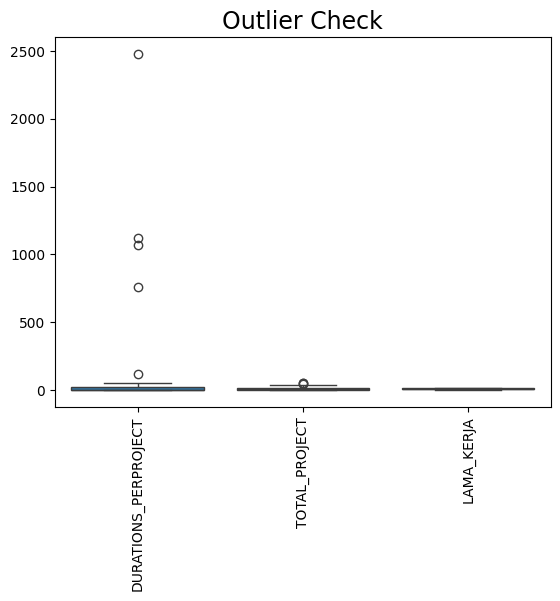

In [8]:
nc= df[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']]
#displaying outliers
sns.boxplot(nc)
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()

In [9]:
#function to handle outliers
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [10]:
#handling numerical data outliers
for col in ['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']:
    df = handle_outliers_iqr(df, col)

In [11]:
df

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,LEVEL KEAHLIAN
0,0.000,2.000,Kontrak,3.0,DSO,B1,Jakarta,Perekayasa Madya
1,7.000,6.000,Tetap,16.0,DSO,C3,Malang,Pimpinan Muda
2,29.000,3.000,Tetap,9.0,DIP,B3,Malang,Pimpinan Pemula
3,0.000,40.125,Tetap,16.0,DIP,C3,Malang,Pimpinan Muda
4,58.125,11.000,Tetap,7.0,DSO,B3-MI,Malang Madani,Perekayasa Utama
5,17.000,1.000,Tetap,11.0,DIP,B3,Malang,Pimpinan Pemula
6,0.000,6.000,Tetap,8.0,DSO,A3,Jakarta,Perekayasa Utama
7,3.000,9.000,Tetap,15.0,DIP,B4,Malang,Pimpinan Pemula
8,58.125,2.000,Tetap,14.0,DBM,B3,Jakarta,Perekayasa Utama
9,6.000,9.000,Tetap,8.0,DSO,B2-MI,Malang Madani,Perekayasa Muda


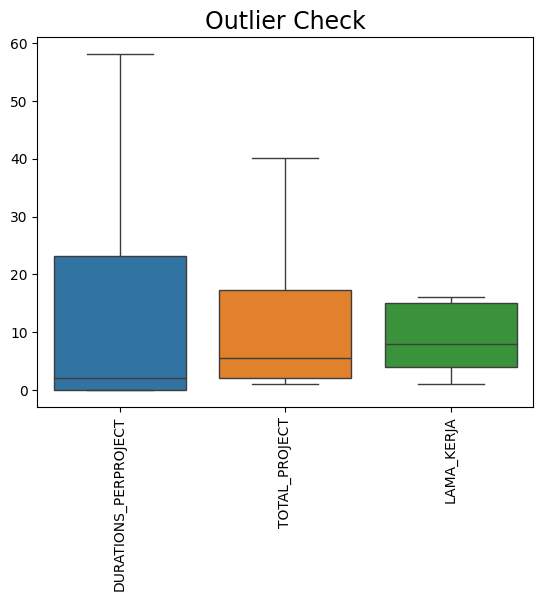

In [12]:
sns.boxplot(df)
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()

## Categorical Data

https://www.w3schools.com/python/python_ml_preprocessing.asp#gsc.tab=0&gsc.q=decision%20tree%20classifier

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [13]:
df= df.drop(['LOKASI'], axis= 1)
df.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LEVEL KEAHLIAN
0,0.000,2.000,Kontrak,3.0,DSO,B1,Perekayasa Madya
1,7.000,6.000,Tetap,16.0,DSO,C3,Pimpinan Muda
2,29.000,3.000,Tetap,9.0,DIP,B3,Pimpinan Pemula
3,0.000,40.125,Tetap,16.0,DIP,C3,Pimpinan Muda
4,58.125,11.000,Tetap,7.0,DSO,B3-MI,Perekayasa Utama


In [14]:
#LabelEncoder for small unique data
le_status = LabelEncoder()
df['STATUSenc'] = le_status.fit_transform(df['STATUS'])
joblib.dump(le_status, 'le_status.pkl')

['le_status.pkl']

In [15]:
# le_lokasi = LabelEncoder()
# df['LOKASIenc'] = le_lokasi.fit_transform(df['LOKASI'])
# joblib.dump(le_lokasi, 'le_lokasi.pkl')

In [16]:
#OneHotEncoder for many unique data
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = ohe.fit_transform(df[['DIVISI', 'GOL']])
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['DIVISI', 'GOL']))
df = pd.concat([df, encoded_df], axis=1)
joblib.dump(ohe, 'ohe.pkl')

['ohe.pkl']

## Standarization Numerical

In [17]:
scaler = StandardScaler()
df[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']] = scaler.fit_transform(df[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']])
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Data Model

https://www.geeksforgeeks.org/getting-started-with-classification/

In [18]:
df.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LEVEL KEAHLIAN,STATUSenc,DIVISI_DAK,DIVISI_DBM,...,GOL_B1-MI,GOL_B2,GOL_B2-MI,GOL_B3,GOL_B3-MI,GOL_B4,GOL_C1,GOL_C2,GOL_C3,GOL_F2
0,-0.698048,-0.742136,Kontrak,-1.149470,DSO,B1,Perekayasa Madya,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.368794,-0.410802,Tetap,1.372574,DSO,C3,Pimpinan Muda,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.666004,-0.659302,Tetap,0.014550,DIP,B3,Pimpinan Pemula,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.698048,2.415889,Tetap,1.372574,DIP,C3,Pimpinan Muda,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.035936,0.003365,Tetap,-0.373457,DSO,B3-MI,Perekayasa Utama,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df= df.drop(['STATUS', 'DIVISI', 'GOL'], axis=1)

In [20]:
df.shape

(40, 23)

## Splits

In [21]:
#input and target
X= df.drop(['LEVEL KEAHLIAN'], axis=1)
y= df['LEVEL KEAHLIAN']

In [22]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [23]:
#saving the order
joblib.dump(X_train.columns, 'feature_order.pkl')

['feature_order.pkl']

## Tuning

https://www.geeksforgeeks.org/hyperparameter-tuning/

In [ ]:
#optuna
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["DecisionTree", "RandomForest", "SVM", "NaiveBayes"])
    
    if classifier_name == "DecisionTree":
        max_depth = trial.suggest_int("max_depth", 2, 32)
        classifier_obj = DecisionTreeClassifier(max_depth=max_depth)
    elif classifier_name == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 10, 100)
        max_depth = trial.suggest_int("max_depth", 2, 32)
        classifier_obj = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    elif classifier_name == "SVM":
        C = trial.suggest_float("C", 1e-10, 1e10, log=True)
        classifier_obj = SVC(C=C)
    elif classifier_name == "NaiveBayes":
        classifier_obj = GaussianNB()
    
    # StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(classifier_obj, X_train, y_train, cv=skf, scoring="accuracy").mean()
    return score

In [ ]:
# Optuna study untuk tuning hyperparameter
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

In [ ]:
print("Best model:", study.best_trial.params)

In [ ]:
best_params = study.best_trial.params
if best_params['classifier'] == 'RandomForest':
    modela = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
else:
    modela = RandomForestClassifier(n_estimators=75, max_depth=5, min_samples_split=2, min_samples_leaf=2, max_features='log2', random_state=100)


## Eval

### After Several Tunings

In [24]:
modela = RandomForestClassifier(
        n_estimators=75,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features='log2',
        random_state=100)

#Train the best model on the entire training set
modela.fit(X_train, y_train)

# Evaluate on the test set
y_pred = modela.predict(X_test)
# y_pred = bg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, zero_division=0))

# Check if the accuracy meets the threshold
if accuracy >= 0.70:
    print("Model achieved at least 70% accuracy.")
else:
    print("Model did not achieve 70% accuracy.")

Test set accuracy: 0.75
                   precision    recall  f1-score   support

 Perekayasa Madya       1.00      0.50      0.67         2
Perekayasa Magang       1.00      1.00      1.00         1
 Perekayasa Utama       0.50      0.50      0.50         2
    Pimpinan Muda       1.00      1.00      1.00         2
  Pimpinan Pemula       0.50      1.00      0.67         1

         accuracy                           0.75         8
        macro avg       0.80      0.80      0.77         8
     weighted avg       0.81      0.75      0.75         8

Model achieved at least 70% accuracy.


### Cross-Validation on Data Train

https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation

https://www.w3schools.com/python/python_ml_cross_validation.asp

In [25]:
#cross-validation on data train w/ the best model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
cv_results = cross_val_score(modela, X_train, y_train, cv=skf, scoring='accuracy')
print(f'Cross Validation Accuracy: {cv_results.mean()}')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross Validation Accuracy: 0.4333333333333333


In [26]:
modela.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=2,
                       n_estimators=75, random_state=100)

### Saving the model

In [27]:
#saving the model
joblib.dump(modela, 'final_model.pkl')

['final_model.pkl']

### Evaluation on Data Test

In [28]:
test_accuracy = modela.score(X_test, y_test)
print(f'Test Set Accuracy: {test_accuracy}')

Test Set Accuracy: 0.75


### Prediction on New Data

In [29]:
scaler = joblib.load('scaler.pkl')
le_status = joblib.load('le_status.pkl')
#le_lokasi = joblib.load('le_lokasi.pkl')
ohe = joblib.load('ohe.pkl')
#modela = joblib.load('model1.pkl')
feature_order = joblib.load('feature_order.pkl')

#### New_data From Csv

In [ ]:
new_data = pd.read_csv(r"C:\Users\Lenovo\analyst_pkl\data\new_data.csv", sep= ';')

In [ ]:
new_data

In [ ]:
new_data= new_data.drop(['LOKASI'], axis= 1)
new_data

#### New_data Trial

In [ ]:
new_data= {
    'DURATIONS_PERPROJECT': 1.0,
    'TOTAL_PROJECT': 27.0,
    'STATUS': 'Kontrak',
    'LAMA_KERJA': 1,
    'DIVISI': 'DIP',
    'GOL': 'B1-MI'
}

#new_data = pd.DataFrame([new_data], columns=X.columns)
new_data = pd.DataFrame([new_data])


In [ ]:
new_data

#### The Process

In [ ]:
# LE transformation
new_data['STATUSenc'] = le_status.transform(new_data['STATUS'])
#new_data['LOKASIenc'] = le_lokasi.transform(new_data['LOKASI'])

In [ ]:
#Ohe transformation 
encoded_features_new = ohe.transform(new_data[['DIVISI', 'GOL']])
encoded_df_new = pd.DataFrame(encoded_features_new, columns=ohe.get_feature_names_out(['DIVISI', 'GOL']))
new_data = pd.concat([new_data, encoded_df_new], axis=1)

In [ ]:
#standarization
new_data[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']] = scaler.transform(new_data[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']])


In [ ]:
new_data

In [ ]:
# Prediksi dengan model yang telah dilatih
X_new = new_data.drop(columns=['STATUS', 'DIVISI', 'GOL'])  # Sesuaikan dengan fitur yang diinginkan
# Mengatur urutan kolom sama dengan X_train
X_new = new_data.reindex(columns=X_train.columns)
predictions = modela.predict(X_new)

In [ ]:
print(predictions)